Erobot [[2.]
 [2.]
 [0.]]
En [-0.64737255 15.55634919]
z [[0.20999108]
 [2.09599361]]
Xestimate [[0.20970324]
 [2.0956463 ]]
Y measure:  [[0.02320345]
 [0.00249292]
 [0.21106087]]
Robot final position
 [[0.0205955 ]
 [0.00450787]
 [0.20952877]]
Xrobot dot: [[0.205955  ]
 [0.04507872]
 [2.09528774]]
Erobot [[ 2.35117339]
 [ 1.54013463]
 [-0.20952877]]
En [-0.03290899  0.4053047 ]
z [[-0.0106784]
 [-0.107692 ]]
Xestimate [[-0.01080157]
 [-0.10833699]]
Y measure:  [[0.02135609]
 [0.00450249]
 [0.20050695]]
Robot final position
 [[0.01835968]
 [0.00807258]
 [0.19870191]]
Xrobot dot: [[-0.02235819]
 [ 0.03564704]
 [-0.10826864]]
Erobot [[ 2.33584925]
 [ 1.56156379]
 [-0.19870191]]
En [-0.03494387  1.27784474]
z [[0.00068426]
 [0.00288854]]
Xestimate [[0.00037489]
 [0.00234966]]
Y measure:  [[0.01852727]
 [0.00848651]
 [0.1992444 ]]
Robot final position
 [[0.01643779]
 [0.0115648 ]
 [0.19893319]]
Xrobot dot: [[-0.01921887]
 [ 0.03492226]
 [ 0.00231283]]
Erobot [[ 2.33740419]
 [ 1.55722035]
 

Y measure:  [[0.00479869]
 [0.02119912]
 [0.2025381 ]]
Robot final position
 [[-6.20264079e-05]
 [ 2.02216383e-02]
 [ 2.00829040e-01]]
Xrobot dot: [[-0.04016057]
 [ 0.00397926]
 [ 0.00016595]]
Erobot [[ 2.35479356]
 [ 1.54101193]
 [-0.20082904]]
En [1.90106297e-04 1.04069440e+00]
z [[0.00061175]
 [0.00015849]]
Xestimate [[2.16486312e-04]
 [5.61946138e-05]]
Y measure:  [[0.00078552]
 [0.02186587]
 [0.2024984 ]]
Robot final position
 [[-0.00407481]
 [ 0.01981128]
 [ 0.20083466]]
Xrobot dot: [[-4.01278733e-02]
 [-4.10356476e-03]
 [ 5.61946138e-05]]
Erobot [[ 2.35881621]
 [ 1.54060031]
 [-0.20083466]]
En [0.00850177 1.04158625]
z [[0.00095527]
 [0.00054449]]
Xestimate [[0.00033821]
 [0.00019441]]
Y measure:  [[-0.00187886]
 [ 0.02143671]
 [ 0.20219376]]
Robot final position
 [[-0.00791424]
 [ 0.01861328]
 [ 0.2008541 ]]
Xrobot dot: [[-0.0383943 ]
 [-0.01198004]
 [ 0.00019441]]
Erobot [[ 2.36284741]
 [ 1.54096238]
 [-0.2008541 ]]
En [0.01649352 1.04297885]
z [[0.00065674]
 [0.00094828]]
Xes

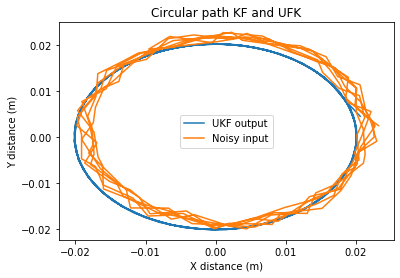

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Robot Constants mentioned in paper
C2 = 5
C3 = 2
C4 = 5
C5 = 5
A1 = 5
B1 = 3
D1 = 3

# robot physical parameters
m = 10
I = 0.1
l = 1
r = 1
delta_t = 0.1 # sec 

# Initialize the KALMAN variables (According to paper)
Q = np.array([[np.exp(-5), 0], [0, np.exp(-6)]])
R = np.array([[np.exp(-2), 0], [0, np.exp(-3)]])
P = 10*Q
H = np.array([[1, 0], [0, 1]])
vc_prev = 0
wc_prev = 0

# Robot location xc, yc, thetac - in world coordinates
X_robot_world = np.array([[0, 0, 0]]).T 
# Robot location xcdot, ycdot, thetacdot - in world coordinates
X_robot_dot_world = np.array([[0, 0, 0]]).T

# Dynamic robot parameters
M = np.array([[m, 0],[0, 1]])
B = np.array([[1,1],[l, l]])*(1/r)


# TODO: Desired position and orientation is supposed to be provided by path planner.
P_d_world = np.array([[2, 2, 0]]).T
P_ddot_world = np.array([[0, 0, 0]]).T
P_ddotdot_world = np.array([[0, 0, 0]]).T

# ex, ey, etheta
e_robot_prev = np.array([[0, 0, 0]]).T
e_d_robot_prev = np.array([[0, 0, 0]]).T
e_world = P_d_world - X_robot_world
count = 200

vr_prev = 0
wr_prev = 0

xcoord = []
ycoord = []

xnoise = []
ynoise = []

# Initialize parameters for UKF - _u means parameters for ukf
Q_u = np.array([[np.exp(-5), 0, 0], [0, np.exp(-5), 0], [0, 0, np.exp(-6)]])
R_u = np.array([[np.exp(2), 0, 0], [0, np.exp(2), 0], [0, np.exp(3), np.exp(3)]])
P_u = 10*Q_u
H_u = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

while count > 0:
    ###################### Robot coordinate frame #########################
    # eD, eL, etheta
    robot_T_world = np.array([[np.cos(X_robot_world[2,0]), np.sin(X_robot_world[2,0]), 0], [-np.sin(X_robot_world[2,0]), np.cos(X_robot_world[2,0]), 0], [0, 0, 1]]) 
    e_robot = robot_T_world @ e_world
    print("Erobot", e_robot)
    e_d_robot = (e_robot - e_robot_prev) / delta_t
    e_robot_prev = e_robot

    e_ddot_robot = (e_d_robot - e_d_robot_prev) / delta_t
    e_d_robot_prev = e_d_robot
    # desired velocity and desired angular velocity - 
    vd = np.sqrt(e_robot[0,0]*e_robot[0,0] + e_robot[1,0]*e_robot[1,0]) * 0.05 + np.sqrt(e_d_robot[0,0]*e_d_robot[0,0] + e_d_robot[1,0]*e_d_robot[1,0]) * 0.05 
    wd = e_robot[2,0] * 0.01 + e_d_robot[2,0] * 0.3 

    # Equation 2
    vc = X_robot_dot_world[1,0] / np.cos(X_robot_world[2,0])
    wc = X_robot_dot_world[2,0]

    ########## Backtracking controller ##############################################
    vr = vd * np.cos(e_robot[1,0])
    wr = wd + C2*vd*e_robot[1,0] + C3*vd*np.sin(e_robot[2,0])

    # print("Vr", vr)
    # print("wr", wr)

    vrdot = (vr - vr_prev) / delta_t
    wrdot = (wr - wr_prev) / delta_t
    vr_prev = vr
    wr_prev = wr
    # Equation 48
    en = np.array([vr - vc, wr - wc])
    print("En", en)

    # Equation 49 and 50
    tL  = m*r*0.5*(vrdot*C4*en[0]) - I*r*0.5*(wrdot*C5*en[1])
    tR  = m*r*0.5*(vrdot*C4*en[0]) + I*r*0.5*(wrdot*C5*en[1])

    # Prediction
    Xpred = np.linalg.inv(M) @ B @ np.array([[tR, tL]]).T * delta_t * 0.1
    F = np.array([[1, 0],[0, 1]])
    Ppred = F @ P @ F.T + Q
    # print("Xpred", Xpred)
    # print("tL", tL)
    # print("tR", tR)
    # Xpred[0,0] = vr
    # Xpred[1,0] = wr
    # Correction
    # TODO: Get a sequence of observations here 
    z = Xpred + np.random.rand(2,1)*0.001
    print("z",z)
    y = z - Xpred
    S = H @ Ppred @ H.T + R
    K = Ppred * H.T * np.linalg.inv(S)

    Xestimate = Xpred + K@y
    Pestimate = (np.identity(2) - K@H) @ Ppred

    print("Xestimate", Xestimate)
    # print("Pestimate", Pestimate)

    # just renaming for future use
    VelcityInputEstimate = Xestimate

    ##################################################### UKF helper functions #############################################
    def ukf_predict(x0, X_robot_world, velocityInputEstimate):
        x_pred = np.array([[0,0,0]],dtype=np.float64).T
        x_pred[0,0] = (x0[0,0] + velocityInputEstimate[0]*np.cos(X_robot_world[2,0])*delta_t)[0]
        x_pred[1,0] = (x0[1,0] + velocityInputEstimate[0]*np.sin(X_robot_world[2,0])*delta_t)[0]
        x_pred[2,0] = (x0[2,0] + velocityInputEstimate[1]*delta_t)[0]
        # print("X", x_pred)
        return x_pred
        
    ##################################################### UNSCENTED KALMAN FILTER ##########################################
    # step1: generate L from P matrix
    L = np.linalg.cholesky(P_u)
    # print("L", L)
    # print("L0", L[:,0])

    # step 1 generate 2N+1 = 7 sigma points
    x0 = X_robot_world
    x1 = X_robot_world + np.array([np.sqrt(3)*L[:,0]]).T
    x2 = X_robot_world + np.array([np.sqrt(3)*L[:,1]]).T
    x3 = X_robot_world + np.array([np.sqrt(3)*L[:,2]]).T
    x4 = X_robot_world - np.array([np.sqrt(3)*L[:,0]]).T
    x5 = X_robot_world - np.array([np.sqrt(3)*L[:,1]]).T
    x6 = X_robot_world - np.array([np.sqrt(3)*L[:,2]]).T

    # predict next output of sigma points
    x0 = ukf_predict(x0, X_robot_world, VelcityInputEstimate)
    x1 = ukf_predict(x1, X_robot_world, VelcityInputEstimate)
    x2 = ukf_predict(x2, X_robot_world, VelcityInputEstimate)
    x3 = ukf_predict(x3, X_robot_world, VelcityInputEstimate)
    x4 = ukf_predict(x4, X_robot_world, VelcityInputEstimate)
    x5 = ukf_predict(x5, X_robot_world, VelcityInputEstimate)
    x6 = ukf_predict(x6, X_robot_world, VelcityInputEstimate)

    # compute mean
    x_mean = x0 + x1 + x2 + x3 + x4 + x5 + x6
    x_mean = x_mean / 7
    # print("Xmean:",x_mean)

    P_u_pred = (x0 - x_mean) @ (x0 - x_mean).T 
    P_u_pred += (x1 - x_mean) @ (x1 - x_mean).T 
    P_u_pred += (x2 - x_mean) @ (x2 - x_mean).T
    P_u_pred += (x3 - x_mean) @ (x3 - x_mean).T
    P_u_pred += (x4 - x_mean) @ (x4 - x_mean).T
    P_u_pred += (x5 - x_mean) @ (x5 - x_mean).T
    P_u_pred += (x6 - x_mean) @ (x6 - x_mean).T

    P_u_pred = P_u_pred / 7


    ############### Correction ###################

    # Since paper uses identity matrix for measurement, predicted sigma points are the observations.
    L = np.linalg.cholesky(P_u_pred)
    y0 = x_mean
    y1 = x_mean + np.array([np.sqrt(3)*L[:,0]]).T
    y2 = x_mean + np.array([np.sqrt(3)*L[:,1]]).T
    y3 = x_mean + np.array([np.sqrt(3)*L[:,2]]).T
    y4 = x_mean - np.array([np.sqrt(3)*L[:,0]]).T
    y5 = x_mean - np.array([np.sqrt(3)*L[:,1]]).T
    y6 = x_mean - np.array([np.sqrt(3)*L[:,2]]).T

    # compute observation mean
    y_mean = y0 + y1 + y2 + y3 + y4 + y5 + y6
    y_mean = y_mean / 7
    # print("Y mean", y_mean)

    Py = (y0 - y_mean) @ (y0 - y_mean).T 
    Py += (y1 - y_mean) @ (y1 - y_mean).T 
    Py += (y2 - y_mean) @ (y2 - y_mean).T
    Py += (y3 - y_mean) @ (y3 - y_mean).T
    Py += (y4 - y_mean) @ (y4 - y_mean).T
    Py += (y5 - y_mean) @ (y5 - y_mean).T
    Py += (y6 - y_mean) @ (y6 - y_mean).T

    Py = Py/ 7 + R_u

    Pxy = (x0 - x_mean) @ (y0 - y_mean).T 
    Pxy += (x1 - x_mean) @ (y1 - y_mean).T 
    Pxy += (x2 - x_mean) @ (y2 - y_mean).T
    Pxy += (x3 - x_mean) @ (y3 - y_mean).T
    Pxy += (x4 - x_mean) @ (y4 - y_mean).T
    Pxy += (x5 - x_mean) @ (y5 - y_mean).T
    Pxy += (x6 - x_mean) @ (y6 - y_mean).T


    K_u = Pxy @ np.linalg.inv(Py)
    # print("K_u",K_u)

    # Estimation step
    # TOD0: Assume measurements are almost accurate
    y_measurement = x_mean + np.random.rand(3,1)*0.003
    print("Y measure: ", y_measurement)
    X_robot_estimated = x_mean + K_u @ (y_measurement - y_mean)
    P_u_estimated = P_u_pred - (K_u @ Py @ K_u.T) 

    world_T_robot = np.array([[np.cos(X_robot_estimated[2,0]), -np.sin(X_robot_estimated[2,0]), 0], [np.sin(X_robot_estimated[2,0]), np.cos(X_robot_estimated[2,0]), 0], [0, 0, 1]]) 
    X_robot_world_estimated = world_T_robot @ X_robot_estimated

    # print(e_robot_T_world)
    # print("Input velocity\n", VelcityInputEstimate)
    print("Robot final position\n", X_robot_world_estimated)
    # print("P final\n", P_u_estimated)

    # Update the states
    X_robot_dot_world = X_robot_world_estimated - X_robot_world
    X_robot_dot_world /= delta_t
    X_robot_world = X_robot_world_estimated
    P_u = P_u_estimated
    e_world = P_d_world - X_robot_world 
    count -= 1
    # print("E:", e_world)
    print("Xrobot dot:", X_robot_dot_world)

    xcoord.append(X_robot_world[0,0])
    ycoord.append(X_robot_world[1,0])
    xnoise.append(y_measurement[0,0])
    ynoise.append(y_measurement[1,0])

plt.plot(xcoord, ycoord, label="UKF output")
plt.plot(xnoise, ynoise, label="Noisy input")
plt.title("Circular path KF and UFK")
plt.xlabel("X distance (m)")
plt.ylabel("Y distance (m)")
plt.legend()
plt.show()